# Substance Use and Academic Performance

## Overview

[Overview Paragraph]

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import nbinom, poisson
import random

### Alcohol

In [45]:
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa_vals = ['4', '3', '2', '1']

a_probabilities = []
b_probabilities = []
c_probabilities = []
f_probabilities = []

for x in range(len(alc_quantity)-1):
    prob = poisson.pmf(x, mu=2.22)
    a_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.37)
    b_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.60)
    c_probabilities.append(prob)
    prob = poisson.pmf(x, mu=3.91)
    f_probabilities.append(prob)

a_probabilities.append(1 - poisson.cdf(9, mu=2.8))
b_probabilities.append(1 - poisson.cdf(9, mu=3.6))
c_probabilities.append(1 - poisson.cdf(9, mu=3.876))
f_probabilities.append(1 - poisson.cdf(9, mu=3.748))

# Sample Data
n = 22424
data = {'GPA': [], 'Number of Drinks': []}
for student in range(n):
    gpa = random.choices(gpa_vals, weights=[0.27, 0.38, 0.21, 0.14])[0]
    if gpa == '4':
        drinks = random.choices(alc_quantity, weights=a_probabilities)[0]
    elif gpa == '3':
        drinks = random.choices(alc_quantity, weights=b_probabilities)[0]
    elif gpa == '2':
        drinks = random.choices(alc_quantity, weights=c_probabilities)[0]
    else:
        drinks = random.choices(alc_quantity, weights=f_probabilities)[0]
    data['GPA'].append(gpa)
    data['Number of Drinks'].append(drinks)

<Axes: xlabel='Number of Drinks', ylabel='Count'>

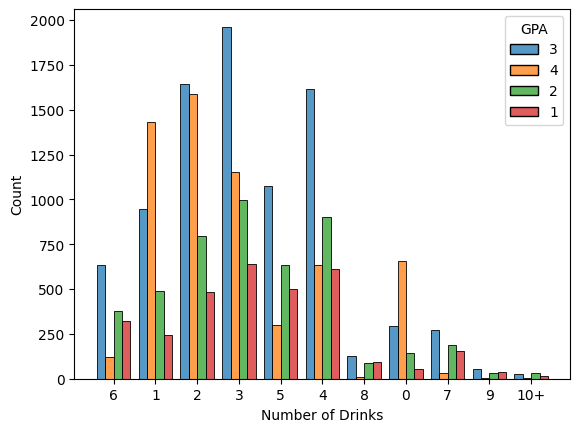

In [49]:
sns.histplot(data=data, x='Number of Drinks', hue='GPA', multiple='dodge', shrink=0.8)

Text(0.5, 1.0, 'Scatter Plot of Number of Drinks vs GPA')

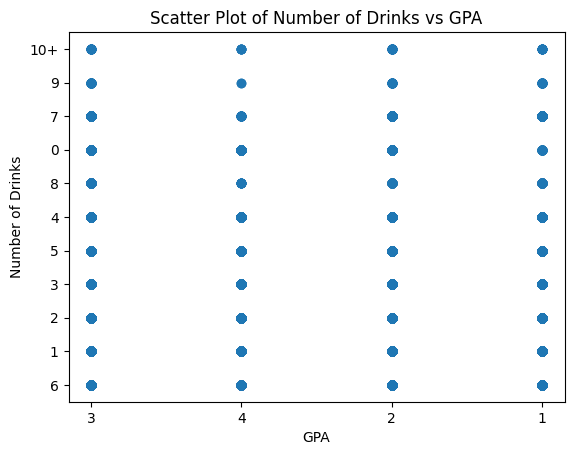

In [48]:
plt.scatter(data['GPA'], data['Number of Drinks'])
plt.xlabel('GPA')
plt.ylabel('Number of Drinks')
plt.title('Scatter Plot of Number of Drinks vs GPA')

In [ ]:
# Measurement Scales
alc_quantity = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
gpa = ['4', '3', '2', '1']

quant_probabilities = []

# Alcohol Quantity Probabilities (CHATGPT-derived NB calculation)

# Values from article
mean_overall = 3.26
sd_overall = 3.952
var_overall = sd_overall**2
p_drink = 0.60   # proportion who drank in past month

# Conditional mean among drinkers
mu_cond = mean_overall / p_drink

# Solve for NB dispersion parameter r (method-of-moments-ish)
numer = p_drink * mu_cond**2
denom = var_overall - p_drink*mu_cond - p_drink*(1-p_drink)*mu_cond**2
r = numer / denom

# NB success probability, bounded to (0,1)
p = r / (r + mu_cond)

# P(0) = structural zero + NB zero
p0 = (1 - p_drink) + p_drink * nbinom.pmf(0, r, p)
quant_probabilities.append(p0)

# P(1) through P(10)
for x in range(1, 11):
    prob = p_drink * nbinom.pmf(x, r, p)
    quant_probabilities.append(prob)

# Tail probability (10+)
p_tail = 1 - sum(quant_probabilities)
quant_probabilities.append(p_tail)
print("Alcohol Quantity Probabilities:", quant_probabilities)

Alcohol Quantity Probabilities: [0.42368365527864443, 0.04916079033219618, 0.0662119874907181, 0.07309042822282928, 0.07180439909080025, 0.06530731138447986, 0.05622468331110176, 0.046453742500933155, 0.037171574248682164, 0.02899152366346336, 0.02214200526007361, 0.05975789921607788]


### Marijuana

### Vaping